In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:


from sklearn.naive_bayes import MultinomialNB # nlp algo use to Positive , Negative comment

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words cloud


import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
import datasets

# Load the dataset
dataset = datasets.load_dataset("md_gender_bias" , "image_chat")
dataset.keys()


dict_keys(['train', 'validation', 'test'])

In [3]:
dataset['train']

Dataset({
    features: ['caption', 'id', 'male', 'female'],
    num_rows: 9997
})

In [4]:
dataset['validation']

Dataset({
    features: ['caption', 'id', 'male', 'female'],
    num_rows: 338180
})

In [5]:
# Prepare data
data = pd.DataFrame(dataset["validation"])
data.head()

,caption,id,male,female
0,<start> a group of people standing in the midd...,1e22a9cf867d718551386b427c3b6d18,False,False
1,<start> a group of people standing next to eac...,96472caea58db27769f1c282e2ac0,False,False
2,<start> a young boy holding a baseball bat on ...,f09d8fb76822158de129acb0fef463,True,False
3,<start> a group of people standing on top of a...,6e4ccc739ff44ed11da20ad9892317,False,False
4,<start> a group of people sitting in a living ...,e7e1844aa9e67cddc6ffe8804d76e45b,False,False


In [6]:
data.tail(10)


,caption,id,male,female
338170,<start> a car driving down a street next to a ...,aa9b5d71149bc22a24c7fffbd35abf,False,False
338171,<start> a close up of a laptop on a wooden tab...,1e344ffcc5a84d53af8447f23581320,False,False
338172,<start> a group of young men standing next to ...,6ce5d94d269c67231bd44ead56c8299,True,False
338173,<start> a small child is holding a baby in her...,55cc84f1d6eb60d2a7c550e5b785d6,False,True
338174,<start> a close up view of a green plant in a ...,cad747dca2b4db4afc64def367be881,False,False
338175,<start> a man is sitting at a table with a lap...,84fb250c718f7ca23c0352cabd54e2,True,False
338176,<start> a glass of red liquid sitting on top o...,5c9e2843de57e598625a10a3288242b5,False,False
338177,<start> a group of people walking down a stree...,ba2b223f2f3a0611776c6d9fec2961,False,False
338178,<start> a large brick building with a clock on...,c9c3f8574d8cf3711b1d351c0ffadb,False,False
338179,<start> a close up of a car on the ground next...,965eddcc8889c48c352f18d305a733,False,False


In [7]:
data = data[['caption', 'male', 'female']]

data.head()

,caption,male,female
0,<start> a group of people standing in the midd...,False,False
1,<start> a group of people standing next to eac...,False,False
2,<start> a young boy holding a baseball bat on ...,True,False
3,<start> a group of people standing on top of a...,False,False
4,<start> a group of people sitting in a living ...,False,False


In [8]:
# mask = (data['male']==True) | (data['female']== True)
# unwanted_rows = data[~mask]
# data = data.drop(unwanted_rows.index)
# data

In [9]:
data["label"]=["neutral" for i in range(0,len(data))]

data.head()

,caption,male,female,label
0,<start> a group of people standing in the midd...,False,False,neutral
1,<start> a group of people standing next to eac...,False,False,neutral
2,<start> a young boy holding a baseball bat on ...,True,False,neutral
3,<start> a group of people standing on top of a...,False,False,neutral
4,<start> a group of people sitting in a living ...,False,False,neutral


In [10]:
# Use numpy.select to set the 'label' column based on conditions
conditions = [
    (data['female'] == False) & (data['male'] == False),
    (data['male'] == True) & (data['female'] == False),
    (data['female'] == True) & (data['male'] == False),
    (data['female'] == True) & (data['male'] == True),
]
choices = ['Bot', 'Male', 'Female', 'Neutral']

# Default to 'Neutral' for other cases
data['label'] = np.select(conditions, choices, )

In [11]:
data.head()

,caption,male,female,label
0,<start> a group of people standing in the midd...,False,False,Bot
1,<start> a group of people standing next to eac...,False,False,Bot
2,<start> a young boy holding a baseball bat on ...,True,False,Male
3,<start> a group of people standing on top of a...,False,False,Bot
4,<start> a group of people sitting in a living ...,False,False,Bot


In [12]:

label_counts = data['label'].value_counts()
print(label_counts)

label
Bot        245075
Male        62512
Female      22321
Neutral      8272
Name: count, dtype: int64


In [13]:
data.isnull().sum()

caption    0
male       0
female     0
label      0
dtype: int64

In [14]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(data.caption.value_counts())
label_counts.head()

,count
caption,
<start> a group of people standing next to each other in a room <eos>,2661
<start> a large building with a clock on top of it <eos>,1933
<start> a group of people standing on top of a lush green field <eos>,1826
<start> a group of young men playing a game of soccer <eos>,1760
<start> a large building with a clock on the side of it <eos>,1518


In [15]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [16]:
print('Getting words tokenized ...')
data['text_tokenized'] = data.caption.map(lambda t: tokenizer.tokenize(t)) # doing with all rows


Getting words tokenized ...


In [17]:
stemmer = SnowballStemmer("english") # choose a language

print('Getting words stemmed ...')
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [18]:
data.sample(20)

,caption,male,female,label,text_tokenized,text_stemmed
91733,<start> a blue and blue bird standing in a gra...,False,False,Bot,"[start, a, blue, and, blue, bird, standing, in...","[start, a, blue, and, blue, bird, stand, in, a..."
203507,<start> a tall tree with a tree in the backgro...,False,False,Bot,"[start, a, tall, tree, with, a, tree, in, the,...","[start, a, tall, tree, with, a, tree, in, the,..."
19258,<start> a black and white dog is standing in t...,False,False,Bot,"[start, a, black, and, white, dog, is, standin...","[start, a, black, and, white, dog, is, stand, ..."
127386,<start> a young woman is holding a tennis rack...,False,True,Female,"[start, a, young, woman, is, holding, a, tenni...","[start, a, young, woman, is, hold, a, tenni, r..."
22469,<start> a group of people standing on a sidewa...,False,False,Bot,"[start, a, group, of, people, standing, on, a,...","[start, a, group, of, peopl, stand, on, a, sid..."
306687,<start> a person walking down a city street in...,False,False,Bot,"[start, a, person, walking, down, a, city, str...","[start, a, person, walk, down, a, citi, street..."
28198,<start> a man sitting at a table in front of a...,True,False,Male,"[start, a, man, sitting, at, a, table, in, fro...","[start, a, man, sit, at, a, tabl, in, front, o..."
163914,<start> a black and white photo of a man and a...,True,True,Neutral,"[start, a, black, and, white, photo, of, a, ma...","[start, a, black, and, white, photo, of, a, ma..."
246815,<start> a bunch of flowers are in a green plan...,False,False,Bot,"[start, a, bunch, of, flowers, are, in, a, gre...","[start, a, bunch, of, flower, are, in, a, gree..."
191475,<start> a bunch of teddy bears that are sittin...,False,False,Bot,"[start, a, bunch, of, teddy, bears, that, are,...","[start, a, bunch, of, teddi, bear, that, are, ..."


In [19]:
print('Getting joiningwords ...')
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))

Getting joiningwords ...


In [20]:
# sliceing classes

Female_comment = data[data.label == 'Female']
Male_comment = data[data.label == 'Male']
Neutral_comment = data[data.label == 'Neutral']
Bots_comment = data[data.label == 'Bot']

In [21]:
Female_comment.head()

,caption,male,female,label,text_tokenized,text_stemmed,text_sent
11,<start> a woman standing in front of a snow co...,False,True,Female,"[start, a, woman, standing, in, front, of, a, ...","[start, a, woman, stand, in, front, of, a, sno...",start a woman stand in front of a snow cover m...
16,<start> a little girl sitting on a chair in a ...,False,True,Female,"[start, a, little, girl, sitting, on, a, chair...","[start, a, littl, girl, sit, on, a, chair, in,...",start a littl girl sit on a chair in a live ro...
27,<start> a woman standing in front of a refrige...,False,True,Female,"[start, a, woman, standing, in, front, of, a, ...","[start, a, woman, stand, in, front, of, a, ref...",start a woman stand in front of a refriger wit...
31,<start> a woman is sitting next to a woman and...,False,True,Female,"[start, a, woman, is, sitting, next, to, a, wo...","[start, a, woman, is, sit, next, to, a, woman,...",start a woman is sit next to a woman and a wom...
57,<start> a young woman sitting on a bench in fr...,False,True,Female,"[start, a, young, woman, sitting, on, a, bench...","[start, a, young, woman, sit, on, a, bench, in...",start a young woman sit on a bench in front of...


In [22]:
Male_comment.head()

,caption,male,female,label,text_tokenized,text_stemmed,text_sent
2,<start> a young boy holding a baseball bat on ...,True,False,Male,"[start, a, young, boy, holding, a, baseball, b...","[start, a, young, boy, hold, a, basebal, bat, ...",start a young boy hold a basebal bat on a base...
5,<start> a group of people sitting in a living ...,True,False,Male,"[start, a, group, of, people, sitting, in, a, ...","[start, a, group, of, peopl, sit, in, a, live,...",start a group of peopl sit in a live room with...
10,<start> a group of men standing next to each o...,True,False,Male,"[start, a, group, of, men, standing, next, to,...","[start, a, group, of, men, stand, next, to, ea...",start a group of men stand next to each other ...
13,<start> a man standing in a living room holdin...,True,False,Male,"[start, a, man, standing, in, a, living, room,...","[start, a, man, stand, in, a, live, room, hold...",start a man stand in a live room hold a wii co...
15,<start> a man wearing glasses and a red shirt ...,True,False,Male,"[start, a, man, wearing, glasses, and, a, red,...","[start, a, man, wear, glass, and, a, red, shir...",start a man wear glass and a red shirt with a ...


In [23]:
Neutral_comment.head()

,caption,male,female,label,text_tokenized,text_stemmed,text_sent
81,<start> a young boy is standing in front of a ...,True,True,Neutral,"[start, a, young, boy, is, standing, in, front...","[start, a, young, boy, is, stand, in, front, o...",start a young boy is stand in front of a woman eo
157,<start> a man and a woman standing next to eac...,True,True,Neutral,"[start, a, man, and, a, woman, standing, next,...","[start, a, man, and, a, woman, stand, next, to...",start a man and a woman stand next to each oth...
199,<start> a bride and groom are cutting a weddin...,True,True,Neutral,"[start, a, bride, and, groom, are, cutting, a,...","[start, a, bride, and, groom, are, cut, a, wed...",start a bride and groom are cut a wed cake eo
297,<start> a man and a woman standing next to eac...,True,True,Neutral,"[start, a, man, and, a, woman, standing, next,...","[start, a, man, and, a, woman, stand, next, to...",start a man and a woman stand next to each oth...
299,<start> a black and white photo of a man and a...,True,True,Neutral,"[start, a, black, and, white, photo, of, a, ma...","[start, a, black, and, white, photo, of, a, ma...",start a black and white photo of a man and a w...


In [35]:
Bots_comment.head()

,caption,male,female,label,text_tokenized,text_stemmed,text_sent
0,<start> a group of people standing in the midd...,False,False,Bot,"[start, a, group, of, people, standing, in, th...","[start, a, group, of, peopl, stand, in, the, m...",start a group of peopl stand in the middl of a...
1,<start> a group of people standing next to eac...,False,False,Bot,"[start, a, group, of, people, standing, next, ...","[start, a, group, of, peopl, stand, next, to, ...",start a group of peopl stand next to each othe...
3,<start> a group of people standing on top of a...,False,False,Bot,"[start, a, group, of, people, standing, on, to...","[start, a, group, of, peopl, stand, on, top, o...",start a group of peopl stand on top of a sandi...
4,<start> a group of people sitting in a living ...,False,False,Bot,"[start, a, group, of, people, sitting, in, a, ...","[start, a, group, of, peopl, sit, in, a, live,...",start a group of peopl sit in a live room play...
6,<start> an airplane is hanging on the ceiling ...,False,False,Bot,"[start, an, airplane, is, hanging, on, the, ce...","[start, an, airplan, is, hang, on, the, ceil, ...",start an airplan is hang on the ceil of a buil...


In [24]:
#create cv object
cv = CountVectorizer()

feature = cv.fit_transform(data.text_sent) #transform all text which we tokenize and stemmed

In [25]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
trainX, testX, trainY, testY = train_test_split(feature, data.label , test_size=0.3  )  # spliting data

In [27]:
# create mnb object
mnb = MultinomialNB()

mnb.fit(trainX,trainY)

MultinomialNB()

In [28]:
mnb.score(testX,testY)
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))

Training Accuracy : 0.9639583315732112
Testing Accuracy : 0.963500699824551


Training Accuracy : 0.9639583315732112
Testing Accuracy : 0.963500699824551

CLASSIFICATION REPORT

                 precision    recall  f1-score   support

 Female_comment       0.96      1.00      0.98     70870
   Male_comment       0.92      0.93      0.93      6598
Neutral_comment       0.99      0.89      0.93     20752
   Bots_comment       0.97      0.75      0.84      3234

       accuracy                           0.96    101454
      macro avg       0.96      0.89      0.92    101454
   weighted avg       0.96      0.96      0.96    101454


CONFUSION MATRIX


<Axes: >

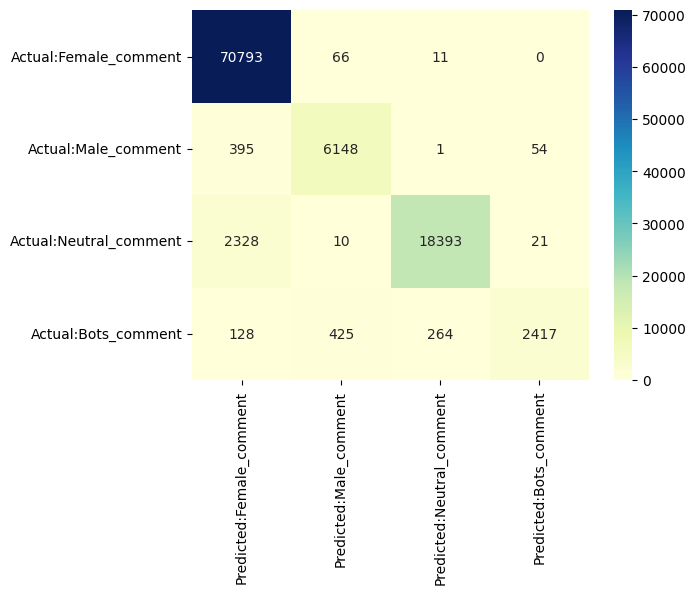

In [29]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat_mnb = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Female_comment', 'Predicted:Male_comment' , 'Predicted:Neutral_comment', 'Predicted:Bots_comment'],
            index = ['Actual:Female_comment', 'Actual:Male_comment' , 'Actual:Neutral_comment', 'Actual:Bots_comment'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Female_comment','Male_comment', 'Neutral_comment', 'Bots_comment' ]))

print('\nCONFUSION MATRIX')
plt.figure()
sns.heatmap(con_mat_mnb, annot = True,fmt='d',cmap="YlGnBu")

In [30]:
pipeline_mnb = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MultinomialNB())

In [31]:
trainX, testX, trainY, testY = train_test_split(data.caption, data.label)

In [32]:
pipeline_mnb.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('multinomialnb', MultinomialNB())])

In [33]:
pipeline_mnb.score(testX,testY) 

0.9620911940386776

Training Accuracy : 0.9634869004672069
Testing Accuracy : 0.9620911940386776

CLASSIFICATION REPORT

                 precision    recall  f1-score   support

 Female_comment       0.96      1.00      0.98     58864
   Male_comment       0.93      0.92      0.92      5616
Neutral_comment       0.97      0.89      0.93     17302
   Bots_comment       0.98      0.73      0.84      2763

       accuracy                           0.96     84545
      macro avg       0.96      0.88      0.92     84545
   weighted avg       0.96      0.96      0.96     84545


CONFUSION MATRIX


<Axes: >

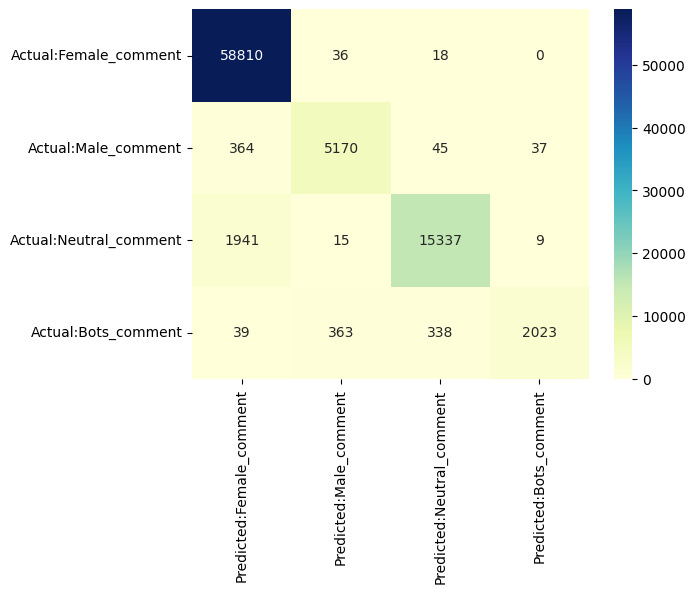

In [34]:
print('Training Accuracy :',pipeline_mnb.score(trainX,trainY))
print('Testing Accuracy :',pipeline_mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_mnb.predict(testX), testY),
            columns = ['Predicted:Female_comment', 'Predicted:Male_comment' , 'Predicted:Neutral_comment', 'Predicted:Bots_comment'],
            index = ['Actual:Female_comment', 'Actual:Male_comment' , 'Actual:Neutral_comment', 'Actual:Bots_comment'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_mnb.predict(testX), testY,
                            target_names =['Female_comment','Male_comment', 'Neutral_comment', 'Bots_comment' ]))

print('\nCONFUSION MATRIX')
plt.figure()
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")